(3000, 4000, 3)


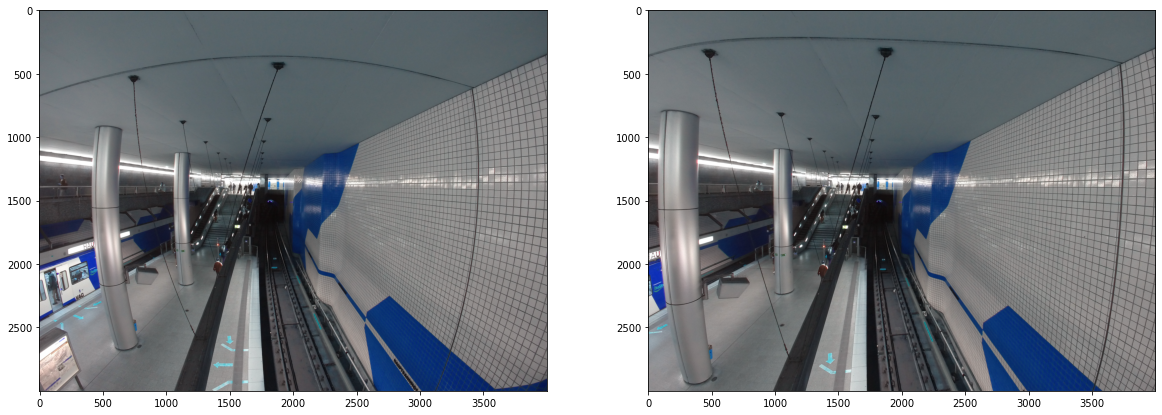

In [25]:
import numpy as np
# from slap.bundle_adjuster import BAdjuster
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/home/pierre/git/university/3d_scanning_and_motion_capture/SLAP/data/test_barrel_distort.jpg")
    
img = cv2.resize(img, (4000,3000), interpolation = cv2.INTER_AREA)


#Gopro params from https://stackoverflow.com/questions/40023288/field-of-view-of-a-gopro-camera
intrinsics = np.eye(3)
intrinsics[0,0] = 582.18394*3.125
intrinsics[1,1] = 582.52915*3.125
intrinsics[0,2] = 2000
intrinsics[1,2] = 1500

distortion_coefs = np.array([-0.25722, 0.09022, -0.00060, 0.00009, 0 if True else -0.01662]) 

# window_name = "habibi"

u_img = cv2.undistort(img, intrinsics, distortion_coefs)
print(u_img.shape)
f, ax = plt.subplots(1,2, figsize=(20,40))
ax[0].imshow(img)
ax[1].imshow(u_img)
# plt.imshow(img)



In [27]:
# Pangolin tutorial works: https://github.com/uoip/pangolin
import numpy as np
import OpenGL.GL as gl
import pangolin

pangolin.CreateWindowAndBind('Main', 640, 480)
gl.glEnable(gl.GL_DEPTH_TEST)

# Define Projection and initial ModelView matrix
scam = pangolin.OpenGlRenderState(
    pangolin.ProjectionMatrix(640, 480, 420, 420, 320, 240, 0.2, 100),
    pangolin.ModelViewLookAt(-2, 2, -2, 0, 0, 0, pangolin.AxisDirection.AxisY))
handler = pangolin.Handler3D(scam)

# Create Interactive View in window
dcam = pangolin.CreateDisplay()
dcam.SetBounds(0.0, 1.0, 0.0, 1.0, -640.0/480.0)
dcam.SetHandler(handler)

while not pangolin.ShouldQuit():
    gl.glClear(gl.GL_COLOR_BUFFER_BIT | gl.GL_DEPTH_BUFFER_BIT)
    gl.glClearColor(1.0, 1.0, 1.0, 1.0)
    dcam.Activate(scam)
    
    # Render OpenGL Cube
    pangolin.glDrawColouredCube()

    # Draw Point Cloud
    points = np.random.random((100000, 3)) * 10
    gl.glPointSize(2)
    gl.glColor3f(1.0, 0.0, 0.0)
    pangolin.DrawPoints(points)

    pangolin.FinishFrame()

Framebuffer with requested attributes not available. Using available framebuffer. You may see visual artifacts.

In [24]:
import numpy as np
import OpenGL.GL as gl
import pangolin
from time import sleep
from scipy.spatial.transform import Rotation

# pangolin.CreateWindowAndBind('Pangolin Test', 640, 480)
gl.glEnable(gl.GL_DEPTH_TEST)

# Define Projection and initial ModelView matrix
scam = pangolin.OpenGlRenderState(
    pangolin.ProjectionMatrix(640, 480, 420, 420, 320, 240, 0.2, 100),
    pangolin.ModelViewLookAt(-2, 2, -2, 0, 0, 0, pangolin.AxisDirection.AxisY))
handler = pangolin.Handler3D(scam)

# Create Interactive View in window
dcam = pangolin.CreateDisplay()
dcam.SetBounds(0.0, 1.0, 0.0, 1.0, -640.0/480.0)
dcam.SetHandler(handler)

def draw_points(pts : np.ndarray):
    assert pts.shape[1] == 3
    gl.glPointSize(2)
    gl.glColor3f(0, 1, 0)
    pangolin.DrawPoints(pts)

def draw_cam(pose: np.ndarray, color: np.ndarray = None):
    assert pose.shape == (4,4)
    assert len(color) == 3 if color else True
    color = list(color) if color else [1.0, 0, 0]
    pangolin.DrawCamera(pose, *color)


while not pangolin.ShouldQuit():
    gl.glClear(gl.GL_COLOR_BUFFER_BIT | gl.GL_DEPTH_BUFFER_BIT)
    gl.glClearColor(1.0, 1.0, 1.0, 1.0)
    dcam.Activate(scam)
    
    # Render OpenGL Cube
    pangolin.glDrawColouredCube()

    # Draw Point Cloud

    points = np.random.random((100000, 3)) * 10
    print(points.shape)
    draw_points(points)

    pose= np.zeros((4,4))
    pose[0:3, 0:3] = Rotation.random().as_matrix()
    pose[0:3,3] = np.array([1,0,0])

    draw_cam(pose)

    pangolin.FinishFrame()
